In [1]:
import netCDF4
from geophys_utils._netcdf_line_utils import NetCDFLineUtils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
import pandas as pd
import importlib
from hydrogeol_utils.plotting_utils import ConductivitySectionPlot
from hydrogeol_utils import SNMR_utils
import time
import os
import sqlalchemy as db
from sqlite3 import dbapi2 as sqlite


# Open the stochastically inverted rjMCMC
# AEM inversoin from GARJMCMCTDEM

rj_path = r"C:\Users\symin\OneDrive\Documents\GA\AEM\rjmcmc.nc"
rj_dataset = netCDF4.Dataset(rj_path)

# Some major issues here

# Create an instance of plots
plots_rj = ConductivitySectionPlot(rj_dataset)

# We will use the same panel settings

line = 105001

cond_vars = ['conductivity_mean', 'conductivity_p10', 'conductivity_p50', 'conductivity_p90',
            'conductivity_highestlikelihood', 'conductivity_lowestmisfit', 'changepoint']


# Grid the line but leave it in memory
gridded_vars = plots_rj.grid_vars(xres = 20., yres =2., lines=line,
                               conductivity_variables = cond_vars,
                               data_variables = None,
                               layer_subdivisions = 4, resampling_method = 'linear',
                               save_hdf5 = False, return_dict = True)


C:\Users\symin\Anaconda3\envs\hydrogeol_utils\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

# The sections will be plotted with a number of panels with a shared horizontal axis
# To define what we will plot for each panel we use a dictionary that define the variable
# to plot (which needs to be inluded in the interpolated) and the 

plot_settings = {'figsize': (20, 11), 'dpi': 300}

panel_settings = {
                  
                 'panel_1': {'variable': 'conductivity_p50',
                             'plot_type': 'grid',
                             'panel_kwargs': {'title': 'AEM conductivity median',
                                              'max_depth': 500, 'shade_doi': False, 'colourbar': True,
                                              'colourbar_label': 'Conductivity (S/m)',
                                             'log_plot': False, 'vmin': 0, 'vmax': 0.1,
                                             'cmap': 'jet', 'ylabel': 'elevation_(mAHD)'},
                             'height_ratio': 5},
                  
                 'panel_2': {'variable': 'conductivity_highestlikelihood',
                             'plot_type': 'grid',
                             'panel_kwargs': {'title': 'AEM conductivity highest likelihood',
                                              'max_depth': 500, 'shade_doi': False, 'colourbar': True,
                                              'colourbar_label': 'Conductivity (S/m)',
                                             'log_plot': True, 'vmin': 0.001, 'vmax': 0.1,
                                            'cmap': 'jet', 'ylabel': 'elevation_(mAHD)'},
                             'height_ratio': 5}}


outdir = r"C:\temp"

# PLot the figure just within the editor
fig, ax_array = plt.subplots(len(panel_settings), 1, sharex=True, figsize=(20, 11),
                                     gridspec_kw={'height_ratios':
                                                  plots_rj.unpack_plot_settings(panel_settings,'height_ratio')})

# Now plot
plots_rj.plot_conductivity_section(ax_array, gridded_vars[line], plot_settings, panel_settings, save_fig = False,
                                  outfile = os.path.join(outdir, str(line) + '.png'))


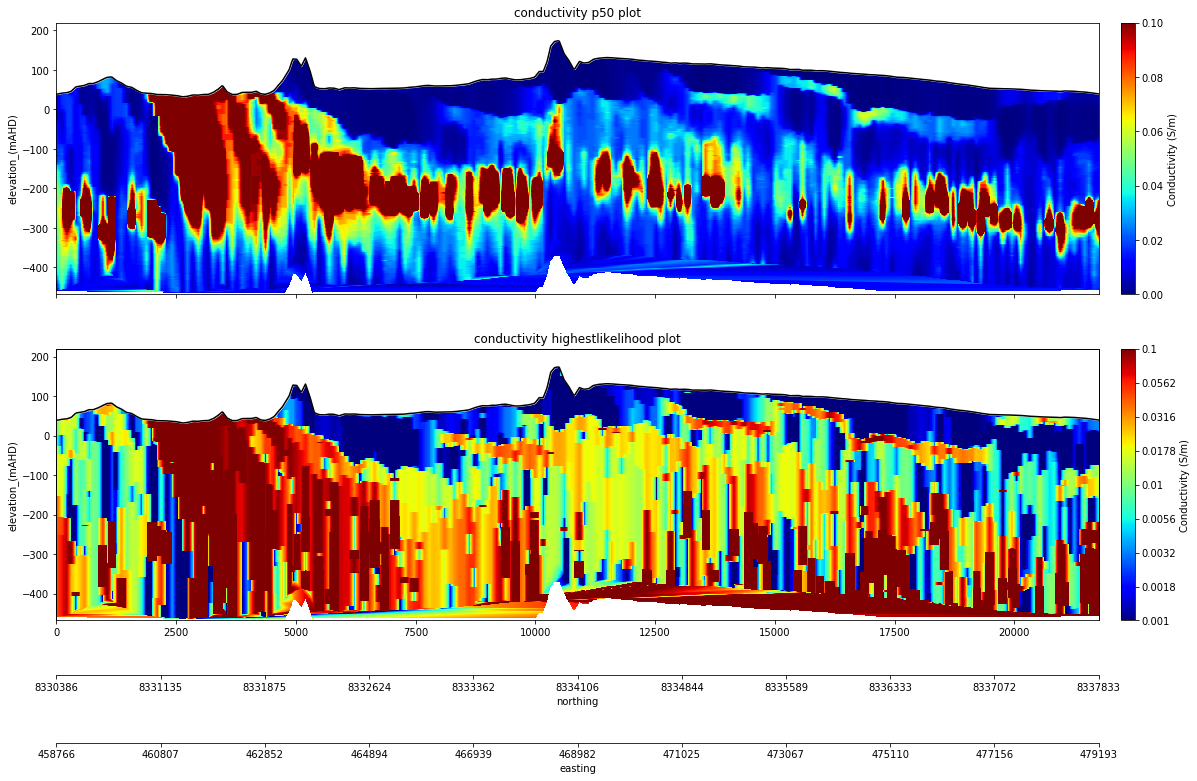

In [3]:
fig